## Ejemplo 01

En este ejemplo, vamos a cargar un dataset de meteoritos, quitaremos datos que son NaN (Not a number) y haremos filtros por valores con el Dataframe de pandas

In [11]:
import pandas as pd
import numpy as np
import json

Abrimos la base de datos de meteoritos del archivo JSON, elegimos las columnas que necesitamos, e inspeccionamos los primeros 5 datos

In [12]:
with open("meteoritos.json","r", encoding="utf-8") as archivo:
    json_meteoritos = json.load(archivo)
    
df_meteoritos = pd.DataFrame.from_dict(json_meteoritos)
dataframe = df_meteoritos[['fall','id','mass','name','reclat','reclong']]
dataframe.head(5)

,fall,id,mass,name,reclat,reclong
0,Fell,1,21,Aachen,50.775000,6.083330
1,Fell,2,720,Aarhus,56.183330,10.233330
2,Fell,6,107000,Abee,54.216670,-113.000000
3,Fell,10,1914,Acapulco,16.883330,-99.900000
4,Fell,370,780,Achiras,-33.166670,-64.950000


El dato 976 tiene valores NaN (Not a Number) lo cual no nos sirve mucho... hay que quitar los datos que no sirven.

In [13]:
dataframe.iloc[976]

fall            Fell
id             23791
mass            1421
name       Talampaya
reclat           NaN
reclong          NaN
Name: 976, dtype: object

In [14]:
dataframe = dataframe.dropna(how='any', axis=0)
dataframe.head(5)

,fall,id,mass,name,reclat,reclong
0,Fell,1,21,Aachen,50.775000,6.083330
1,Fell,2,720,Aarhus,56.183330,10.233330
2,Fell,6,107000,Abee,54.216670,-113.000000
3,Fell,10,1914,Acapulco,16.883330,-99.900000
4,Fell,370,780,Achiras,-33.166670,-64.950000


In [15]:
dataframe.iloc[976]

IndexError: single positional indexer is out-of-bounds

Vamos a forzar a convertir los datos de cada columna. 

In [16]:
convert_dictionary= {
    'fall':str,
    'id':int,
    'mass':float,
    'name':str,
    'reclat':float,
    'reclong':float
}
df_converted = dataframe.astype(convert_dictionary)
df_converted.dtypes

fall        object
id           int32
mass       float64
name        object
reclat     float64
reclong    float64
dtype: object

## Filtrando por valores
Una vez que tenemos los dataframes limpios, podemos filtrar los datos de los meteoritos, por ejemplo, aquellos que solo tienen una masa mayor a 1000 

In [17]:
df_large = df_converted[df_converted['mass'] >= 1000]
df_large

,fall,id,mass,name,reclat,reclong
2,Fell,6,107000.0,Abee,54.21667,-113.00000
3,Fell,10,1914.0,Acapulco,16.88333,-99.90000
5,Fell,379,4239.0,Adhi Kot,32.10000,71.80000
7,Fell,392,30000.0,Agen,44.21667,0.61667
8,Fell,398,1620.0,Aguada,-31.60000,-65.23333
...,...,...,...,...,...,...
993,Fell,23999,3000.0,Tillaberi,14.25000,1.53333
994,Fell,24004,65500.0,Timochin,54.50000,35.20000
996,Fell,54823,7000.0,Tissint,29.48195,-7.61123
997,Fell,24011,20000.0,Tjabe,-7.08333,111.53333


In [21]:
prueba = df_converted[df_converted['reclong'].isnull()] # es lo mismo usar is isna
prueba

,fall,id,mass,name,reclat,reclong


In [24]:
def normaliza(valores, maximo, minimo):
    return (valores - minimo) / (maximo - minimo)

In [25]:
masas = df_converted['mass']
masa_maxima = masas.max()
masa_minima = masas.min()
masas_numpy = masas.to_numpy()

masas_normalizadas = normaliza(masas,masa_maxima,masa_minima)
print(np.min(masas_normalizadas))
print(np.max(masas_normalizadas))

0.0
1.0


In [29]:
normalizadas_df = pd.Series(masas_normalizadas, dtype = float, name = "Masa Normalizada")
df_norm = df_converted.join(normalizadas_df)
df_norm

,fall,id,mass,name,reclat,reclong,Masa Normalizada
0,Fell,1,21.0,Aachen,50.77500,6.08333,9.065217e-07
1,Fell,2,720.0,Aarhus,56.18333,10.23333,3.129783e-05
2,Fell,6,107000.0,Abee,54.21667,-113.00000,4.652167e-03
3,Fell,10,1914.0,Acapulco,16.88333,-99.90000,8.321087e-05
4,Fell,370,780.0,Achiras,-33.16667,-64.95000,3.390652e-05
...,...,...,...,...,...,...,...
995,Fell,24009,230.0,Tirupati,13.63333,79.41667,9.993478e-06
996,Fell,54823,7000.0,Tissint,29.48195,-7.61123,3.043413e-04
997,Fell,24011,20000.0,Tjabe,-7.08333,111.53333,8.695587e-04
998,Fell,24012,16500.0,Tjerebon,-6.66667,106.58333,7.173848e-04


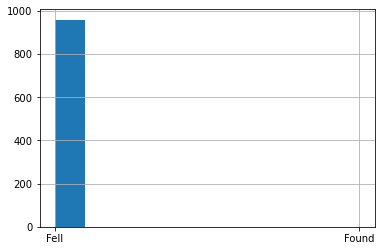

In [30]:
df_norm['fall'].hist()